# Image segmentation


In [4]:
!pip install opencv-python

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.8/54.8 MB 6.6 MB/s eta 0:00:0000:0100:01


In [5]:
import numpy as np
import cv2
import matplotlib.pyplot as plt


# Scaling image factor
##### scale_percent = 50
##### width = int((img.shape[1] * scale_percent )/100)
##### height = int((img.shape[0] *scale_percent ) / 100)
##### dsize = (width,height)
##### cv2.resize(img,dsize)


# Reading the image


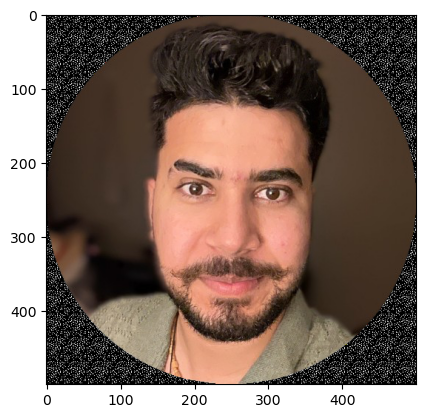

In [6]:
img = cv2.imread("image_p.png")
# cv2.imshow("image1",img)
# cv2.waitKey(0)
# cv2.destroyAllWindows()
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()
original_shape = img.shape

In [7]:
#FLATTEN EACH CHANNEL ALL THE VALUES
all_pixels = img.reshape((-1,3))

In [8]:
all_pixels.shape

(250000, 3)

In [9]:
from sklearn.cluster import KMeans

In [17]:
dominant_colors = 7
km = KMeans(n_clusters=dominant_colors)
km.fit(all_pixels)

KMeans(n_clusters=7)

In [18]:
centers =km.cluster_centers_

In [19]:
centers = np.array(centers,dtype="uint8")

In [20]:
centers

array([[238, 164, 137],
       [ 67,  50,  38],
       [  6,   3,   2],
       [156, 115,  93],
       [254, 254, 254],
       [113,  81,  63],
       [189, 146, 121]], dtype=uint8)

# PLOT COLORS

[238 164 137]
[67 50 38]
[6 3 2]
[156 115  93]
[254 254 254]
[113  81  63]
[189 146 121]


<function matplotlib.pyplot.show(close=None, block=None)>

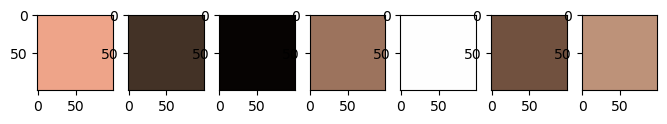

In [21]:
i = 1
plt.figure(0, figsize=(8,2))

colors = []
for each_col in centers:
    plt.subplot(1,dominant_colors,i)
    print(each_col)
    i +=1
    colors.append(each_col)
    #color swatch
    a = np.zeros((100,100,3),dtype="uint8")
    a[:,:,:]  = each_col
    plt.imshow(a)
plt.show

# SEGMENTATION

In [22]:
w,h,z = original_shape
new_img = np.zeros((w*h,z),dtype="uint8")


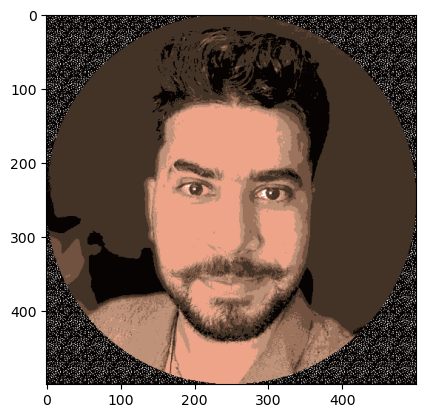

In [23]:
for ix in range(new_img.shape[0]):
    new_img[ix] = colors[km.labels_[ix]]
new_img = new_img.reshape((original_shape))
plt.imshow(new_img)
plt.show()

In [34]:
km.labels_[10:50]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [26]:
cv2.imwrite("output_image.png",new_img)

True